In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

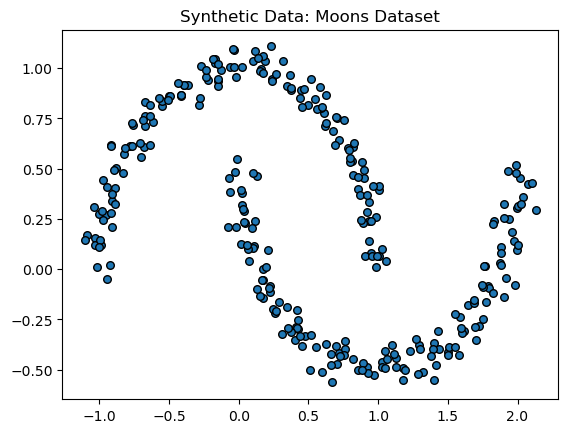

In [2]:
# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], s=30, edgecolors='k')
plt.title("Synthetic Data: Moons Dataset")
plt.show()


In [3]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

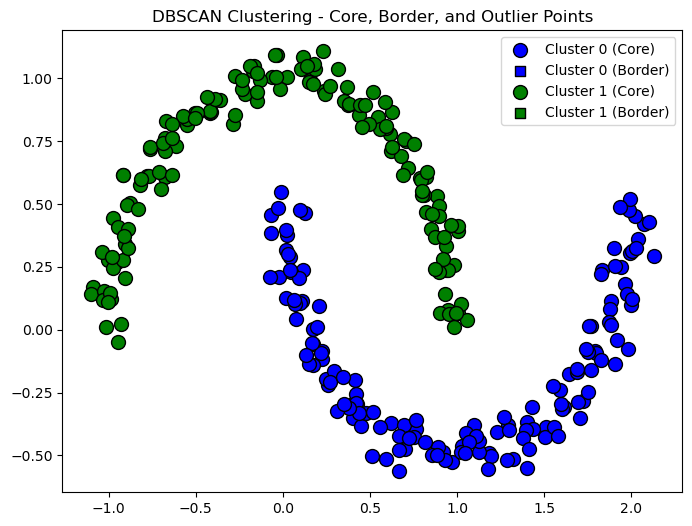

In [4]:
# Identify core, border, and noise points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(labels)

# Create a figure
plt.figure(figsize=(8, 6))

# Define colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'gray'  # Outliers

    class_member_mask = labels == k

    # Plot core points
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, edgecolors='k', s=100, label=f'Cluster {k} (Core)' if k != -1 else "Outliers")

    # Plot border points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, edgecolors='k', s=50, marker='s', label=f'Cluster {k} (Border)' if k != -1 else "")

plt.title("DBSCAN Clustering - Core, Border, and Outlier Points")
plt.legend()
plt.show()
